# Project - Predicting number of rental bikes
Author: *Jintao Wang*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 0. Function definitions

To find the best model, root-mean squared error (rms) was used as a score function. The rms score function needs to be minimized, because the optimal score is 0, larger values are worse performances. 

In scikit-learn, only *maximization* is implemented. Hence, it is customary to maximize the *negative* rms. scitkit-learn provides a scoring function `neg_root_mean_squared_error`.

In [2]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

def get_regressor_neg_rms(model, X, y, cv=7):
    '''Calculate train and validation score for regressor (model) using cross-validation
        
        score is negative root mean-squared error (rms).
        
        model (sklearn classifier): Regressor to train and evaluate
        X (numpy.array or pandas.DataFrame): Feature matrix
        y (numpy.array or pandas.Series): Target vector
        
        returns: mean training negative rms, mean validation negative rms
    
    '''
    #add function body here
    scores = cross_validate(model, X, y, scoring='neg_root_mean_squared_error',cv=7, return_train_score = True)   
    
    mse_training = scores['train_score'].mean()
    mse_validation = scores['test_score'].mean()
    
    return mse_training, mse_validation
    

## 1. Load data
yellowbrick bikeShare  
https://www.scikit-yb.org/en/latest/api/datasets/bikeshare.html

Print the README of the bikeShare Dataset object. Load the Dataset object by using `return_dataset=True`.


In [3]:
#load the yellowbrick bikeShare Dataset object and access the README
from yellowbrick.datasets import load_bikeshare
dataset = load_bikeshare(return_dataset=True)
print(dataset.README)

# Bike Sharing

**Downloaded from the UCI Machine Learning Repository on May 4, 2017.**

- Univariate Data Set
- Integer, Real Attributes
- 17,379 Instances
- 16 attributes
- Well suited for _regression_ tasks
- [https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)

## Abstract

This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.

## Description

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due t

### *Question :* What is the target variable name in this dataset?

The target variable is count of total rental bikes.

### 1.1 Prepare the feature matrix and target vector
Load the bikeShare data set into feature matrix `X` and target vector `y`.

Print dimensions and type of `X`, `y`.

In [4]:
#Load feature matrix X and target vector y, print shapes

X, y = load_bikeshare()

print(X.ndim, X.shape)

print(y.ndim, y.shape)

2 (17379, 12)
1 (17379,)


## 2. Inspect the data 

### 2.1 Range of each feature
To get an idea if the features are on the same scale, we inspect the range of features.

Print the minimum and maximum of each feature in `X`.

In [5]:
# print range (minimum and maximum) of features
print(X.min())

season        1.00
year          0.00
month         1.00
hour          0.00
holiday       0.00
weekday       0.00
workingday    0.00
weather       1.00
temp          0.02
feelslike     0.00
humidity      0.00
windspeed     0.00
dtype: float64


In [6]:
print(X.max())

season         4.0000
year           1.0000
month         12.0000
hour          23.0000
holiday        1.0000
weekday        6.0000
workingday     1.0000
weather        4.0000
temp           1.0000
feelslike      1.0000
humidity       1.0000
windspeed      0.8507
dtype: float64


### 2.2 Boxplot of features 
Using seaborn boxplot, plot all features. This provides a visual view of feature ranges.

Text(0.5, 1.0, 'Range of features')

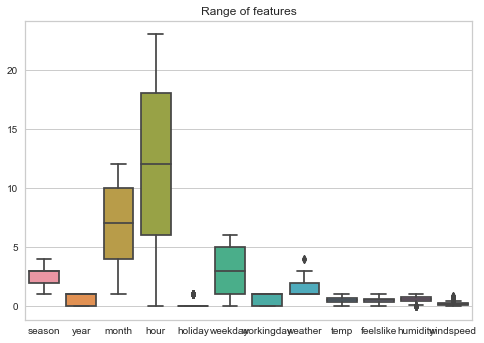

In [7]:
#add boxplot of features

sns.boxplot(data=X)
plt.title("Range of features")

### 2.3 Correlation heatmap of features 

To understand if pairs of features are potentially related, contain similar information, pair-wise cross-correlation can be calculated. Models benefit most from un-correlated features.

Using pandas `corr()` method, create the cross-correlations between all features. Plot this cross-correlation object using seaborn `heatmap()` with parameters `vmin=-1, vmax=1, annot=True, cmap='BrBG'`. Add a title.

Pandas `corr()` calculates [Pearson correlation ](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) :
>  It has a value between +1 and −1. A value of +1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation.

In [8]:
# add pairwise cross-correlation heatmap of features
X.corr()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feelslike,humidity,windspeed
season,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773
year,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740
month,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386
hour,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252
holiday,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988
weekday,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502
workingday,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830
weather,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226
temp,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125
feelslike,0.319380,0.039222,0.208096,0.133750,-0.030973,-0.008821,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336


Text(0.5, 1.0, 'Cross-correlations between all features')

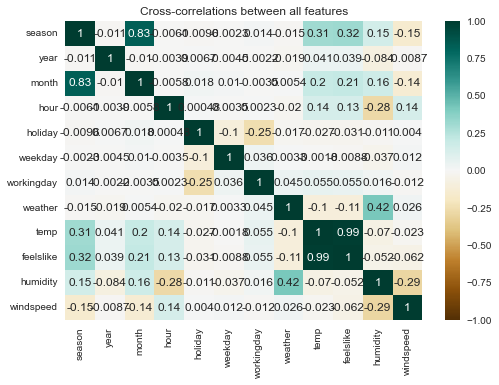

In [9]:
sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title("Cross-correlations between all features")

### 2.4 Histogram of target variable 

To understand if all target values are equally represented in the data, we analyze how many samples of each target value we have available. The histogram of the target vector can visualize this distribution.

Using seaborn `displot()`, plot the histogram of the target vector. Add a title.

Text(0.5, 1.0, ' Number of samples of each target value ')

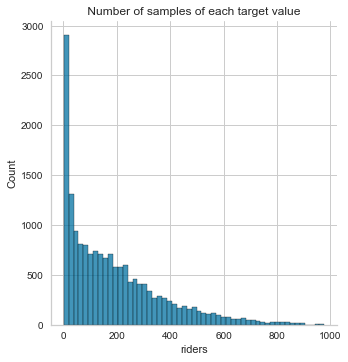

In [10]:
#Add histogram of targect vector
sns.displot(y)
plt.title(" Number of samples of each target value ")

## 3. Create training and test sets

Using scikit-learn `train_test_split()` with parameters `random_state=37`, `test_size=0.2`, split `X` and `y` into training and test sets.

In [11]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=37, test_size=0.2)

## 4. Compare models using cross-validation

Create a list containing a `LinearRegression()`, `RandomForestRegressor(random_state=64)` and `GradientBoostingRegressor(random_state=79)` objects.

Iterate this list, compute the negative root mean-squared error using the `get_regressor_neg_rms()` function, and print the training and validation scores with **2 decimal places**. Use 7-fold cross-validation.

In [12]:
#Calling get_regressor_neg_rms() for each model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
model = LinearRegression().fit(X_train, y_train)
model = RandomForestRegressor(random_state=64).fit(X_train,y_train)
model = GradientBoostingRegressor(random_state=79).fit(X_train,y_train)

for model in [LinearRegression(),RandomForestRegressor(),GradientBoostingRegressor()]:
    train,val = get_regressor_neg_rms(model, X_train, y_train, cv=7)
    print(model, ': Training negative root mse:', round(train,2),', Validation negative root mse:', round(val,2))
    

LinearRegression() : Training negative root mse: -142.1 , Validation negative root mse: -142.23
RandomForestRegressor() : Training negative root mse: -16.18 , Validation negative root mse: -42.77
GradientBoostingRegressor() : Training negative root mse: -69.04 , Validation negative root mse: -70.41


### *Question :* For each of the three models, state if models are potentially over- or underfitting and why.

Linear regression is potentially underfitting, because of low Train negative RMSE, low Test negative RMSE.

Random forest regressor is potentially overfitting, because of high Train negative RMSE and low  Test negative RMSE.


## 5. Find a better model

Use the `RandomForestRegressor(random_state=64)` and find the best combination of `max_depth` from the list of `[10, 15, 20]`, and `n_estimators` from the list of `[50, 100, 150]`.

Use nested for-loops to iterate these two lists, compute the negative root mean-squared error of the corresponding `RandomForestRegressor(random_state=64)` using the `get_regressor_neg_rms()` function, and print the training and validation scores with **2 decimal places**. Use 7-fold cross-validation.

In [13]:
#Calling get_regressor_neg_rms() for each parameter pair
max_depth = [10, 15, 20]
n_estimators = [50, 100, 150]

for i in max_depth:
    for j in n_estimators:
        model = RandomForestRegressor(random_state=64, max_depth = i, n_estimators = j).fit(X_train,y_train)
        
        train,val = get_regressor_neg_rms(model, X_train, y_train, cv=7)
        print('max_depth =', i, ', n_estimators =', j, ', Training negative root mse: {:.2f}'.format(train),', Validation negative root mse: {:.2f}'.format(val))
        print('\n')

max_depth = 10 , n_estimators = 50 , Training negative root mse: -42.81 , Validation negative root mse: -50.99


max_depth = 10 , n_estimators = 100 , Training negative root mse: -42.69 , Validation negative root mse: -50.93


max_depth = 10 , n_estimators = 150 , Training negative root mse: -42.62 , Validation negative root mse: -50.88


max_depth = 15 , n_estimators = 50 , Training negative root mse: -21.25 , Validation negative root mse: -43.37


max_depth = 15 , n_estimators = 100 , Training negative root mse: -20.90 , Validation negative root mse: -43.17


max_depth = 15 , n_estimators = 150 , Training negative root mse: -20.77 , Validation negative root mse: -43.16


max_depth = 20 , n_estimators = 50 , Training negative root mse: -17.02 , Validation negative root mse: -42.98


max_depth = 20 , n_estimators = 100 , Training negative root mse: -16.61 , Validation negative root mse: -42.77


max_depth = 20 , n_estimators = 150 , Training negative root mse: -16.46 , Validation negat

### *Question 3:* Which combination of `max_depth` and `n_estimators` produced the best validation score? Report this score here.


Combination of max_depth = 20 , n_estimators = 100 produced the best validation score. Validation negative root mse is -42.77


## 6. Retrain best model

Create a `RandomForestRegressor(random_state=64)` with the best pair of `max_depth` and `n_estimators`, and retrain this model on all training data.

In [14]:
#retrain the best estimator
best_model = RandomForestRegressor(random_state=64, max_depth = 20, n_estimators = 100).fit(X_train,y_train)
y_model = model.predict(X_test)

## 7. Evaluate best model on training and test data
### 7.1 Root mean-squared error and R-squared

For the retrained best estimator, print the root mean-squared error (**2 decimal places**) and R-squared (**3 decimal places**) for training and test sets.

In [15]:
# print rms and r-squared for training and test set
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

root_mse_train = -(cross_val_score(model, X_train, y_train, cv = 7, scoring='neg_root_mean_squared_error').mean())
root_mse_test = -(cross_val_score(model, X_test, y_test, cv = 7, scoring='neg_root_mean_squared_error').mean())

R_squared_train = cross_val_score(model, X_train, y_train, cv = 7, scoring='r2').mean()
R_squared_test = cross_val_score(model, X_test, y_test, cv = 7, scoring='r2').mean()

print('Training root mean squared error: {:.2f}'.format(root_mse_train))
print('Test root mean squared error: {:.2f}'.format(root_mse_test))
print('Training R squared error: {:.3f}'.format(R_squared_train))
print('Test R squared error: {:.3f}'.format(R_squared_test))

Training root mean squared error: 42.79
Test root mean squared error: 55.78
Training R squared error: 0.944
Test R squared error: 0.904


### 7.2 Predicted vs actual strength plot
Using a scatterplot, show predicted strength on the x axis and actual strength on the y axis with data from the test set. With this plot, we can see where we make errors.

Add a line of unity (diagonal with slope 1 and offset 0). Ideally, all points would be on this line. We look for points being distributed equally around the line of unity.

Add x-axis, y-axis labels including units, and a title.


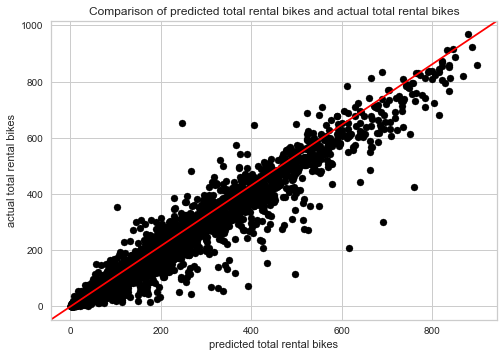

In [16]:
#predicted-actual plot
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
fig, ax = plt.subplots()
ax.scatter(y_model, y_test, c='black')
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

plt.xlabel("predicted total rental bikes")
plt.ylabel("actual total rental bikes")
plt.title("Comparison of predicted total rental bikes and actual total rental bikes")
plt.show()

### 7.3 Residual plot
Using a scatterplot, show predicted strength on the x axis and the *difference* between actual and predicted strength on the y axis with data from the test set. This is an alternative way to see where errors are made.

We look for residuals being distributed equally around the zero horizontal line.

Add x-axis, y-axis labels including units, and a title.



Text(0.5, 0, 'predicted total rental bikes')

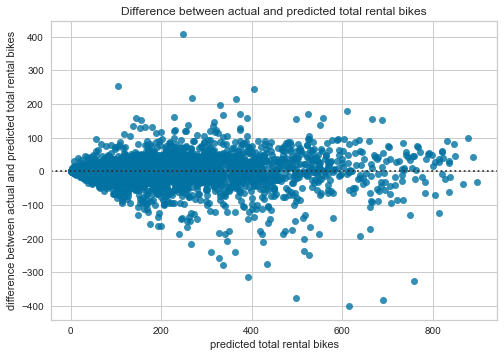

In [17]:
# Residual plot
sns.residplot(x = y_model, y = y_test, data = y)
plt.title("Difference between actual and predicted total rental bikes")
plt.ylabel("difference between actual and predicted total rental bikes")
plt.xlabel("predicted total rental bikes")